# SpeakAge - Predicting Child Age from Conversation Data
Author: Adi Salmon


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Final_Project/kids_dataset.csv"
df = pd.read_csv(file_path)

##  Basic dataset overview

In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (1831, 46)

First 5 rows:


,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,age_bin_readable,total_words,...,speaking_rate,phonological_features,avg_word_length,vowel_ratio,cluster_ratio,phoneme_diversity,noun_verb_ratio,specific_gram_pronouns,specific_gram_plurals,specific_gram_verbs
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[(INV, this is something my sister got for chr...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,5-6,4419.0,...,4.330677,"{'avg_word_length': 4.0565777368905245, 'vowel...",4.056578,0.368636,0.465961,34,1.017143,490,44,350
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[(MOT, look Lovey), (CHI, what?), (MOT, look),...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2-3,634.0,...,2.761194,"{'avg_word_length': 3.8972972972972975, 'vowel...",3.897297,0.370319,0.410811,27,1.081081,49,1,37
2,my open it up. a mirror. can't see anything?. ...,29.0,Tommerdahl_ECG,"[(MOT, what've you got there?), (CHI, my open ...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2-3,1752.0,...,2.952756,"{'avg_word_length': 3.816, 'vowel_ratio': 0.38...",3.816000,0.380154,0.409333,30,1.604396,119,17,91
3,um. Mommy I can't read!. I don't know. no UNRE...,67.0,HSLLD_trire,"[(INV, okay you can just tell me the story too...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",5-6,437.0,...,3.725000,"{'avg_word_length': 4.342281879194631, 'vowel_...",4.342282,0.350850,0.503356,27,3.153846,28,7,13
4,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[(EXP, okay this is Julia and Deborah for the ...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",5-6,226.0,...,10.888889,"{'avg_word_length': 3.6020408163265305, 'vowel...",3.602041,0.345609,0.602041,22,1.888889,10,4,9


### Info about columns and data types

In [ ]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   child_text                1831 non-null   object 
 1   child_age                 1831 non-null   float64
 2   child_name                1831 non-null   object 
 3   conversation              1831 non-null   object 
 4   child_gender              1733 non-null   object 
 5   corpus_name               1831 non-null   object 
 6   file_name                 1831 non-null   object 
 7   child_group               1831 non-null   object 
 8   age_bin_readable          1831 non-null   object 
 9   total_words               1831 non-null   float64
 10  num_lines                 1831 non-null   float64
 11  num_child_lines           1831 non-null   float64
 12  total_child_words         1831 non-null   float64
 13  avg_child_words_per_line  1831 non-null   float6

### Summary statistics for numeric columns

In [ ]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,child_age,total_words,num_lines,num_child_lines,total_child_words,avg_child_words_per_line,child_participation,child_word_ratio,mtld,vocd,...,max_utt_len,speaking_rate,avg_word_length,vowel_ratio,cluster_ratio,phoneme_diversity,noun_verb_ratio,specific_gram_pronouns,specific_gram_plurals,specific_gram_verbs
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,...,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,47.578372,1624.318405,388.133261,154.050792,513.981977,3.444416,0.433735,0.365426,22.964515,45.504786,...,13.920262,3.444416,4.383767,0.369263,0.468391,27.851993,inf,98.058438,11.132168,77.634080
std,14.088567,1513.680993,365.677676,145.757974,497.353910,1.465666,0.184320,0.214578,10.286984,20.666036,...,8.204902,1.465666,0.814572,0.016578,0.078250,2.140794,NaN,100.367001,13.001808,78.313566
min,25.000000,64.000000,14.000000,4.000000,50.000000,1.117647,0.031818,0.018788,3.636364,1.277081,...,3.000000,1.117647,3.093750,0.298734,0.196602,20.000000,0.178571,0.000000,0.000000,0.000000
25%,35.000000,515.000000,145.500000,55.000000,156.000000,2.511729,0.322243,0.220572,15.868557,29.641491,...,9.000000,2.511729,3.896283,0.358783,0.418319,27.000000,1.128765,27.000000,2.000000,22.000000
50%,47.000000,1124.000000,267.000000,107.000000,334.000000,3.161765,0.407932,0.325792,21.724921,44.805903,...,12.000000,3.161765,4.184466,0.369084,0.458453,28.000000,1.500000,62.000000,7.000000,50.000000
75%,61.000000,2233.500000,497.000000,203.000000,727.500000,3.963290,0.491974,0.447807,28.292226,60.675256,...,17.000000,3.963290,4.608857,0.379070,0.511174,29.000000,2.114575,135.000000,15.000000,109.000000
max,71.000000,11346.000000,2453.000000,1201.000000,2785.000000,20.200000,1.000000,1.000000,90.217742,108.993292,...,94.000000,20.200000,11.452381,0.446903,0.858974,34.000000,inf,724.000000,123.000000,532.000000


### Check missing values

In [ ]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
child_text                   0
child_age                    0
child_name                   0
conversation                 0
child_gender                98
corpus_name                  0
file_name                    0
child_group                  0
age_bin_readable             0
total_words                  0
num_lines                    0
num_child_lines              0
total_child_words            0
avg_child_words_per_line     0
conversation_json            0
child_participation          0
child_word_ratio             0
mtld                         0
vocd                         0
mattr                        0
mlum                         0
kc                           0
kc_per_word                  0
kc_per_line                  0
clause_density               0
ipsyn                        0
ipsyn_per_word               0
narrative_complexity         0
num_child_turns              0
avg_child_turn_length        0
cohesion                     0
ipsyn_per_t

## Data Preparation

### Defining Age Bins

In [ ]:
bins = [24, 36, 60, 72]
labels = ["2-3", "3-5", "5-6"]

df["age_bin_readable"] = pd.cut(df["child_age"], bins=bins, labels=labels, right=True)

####  Visualize distribution of target variable (age_bin)

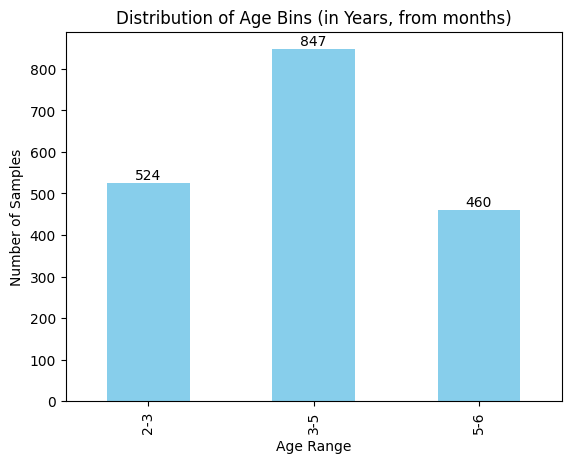

In [ ]:
import matplotlib.pyplot as plt

df['age_bin_readable'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title("Distribution of Age Bins (in Years, from months)")
plt.xlabel("Age Range")
plt.ylabel("Number of Samples")

# Show counts above bars
for i, val in enumerate(df['age_bin_readable'].value_counts().sort_index()):
    plt.text(i, val + 10, str(val), ha='center')

plt.show()

#### Pie Chart – Age Group Proportion

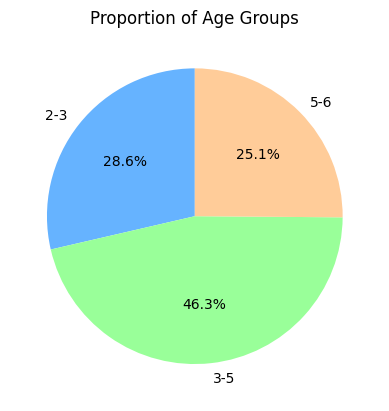

In [ ]:
df['age_bin_readable'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99', '#ffcc99'],
    startangle=90
)
plt.title("Proportion of Age Groups")
plt.ylabel("")
plt.show()

In [ ]:
import seaborn as sns

#### Histogram – Conversation Length

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['total_words'] = df['child_text'].apply(lambda x: len(str(x).split()))

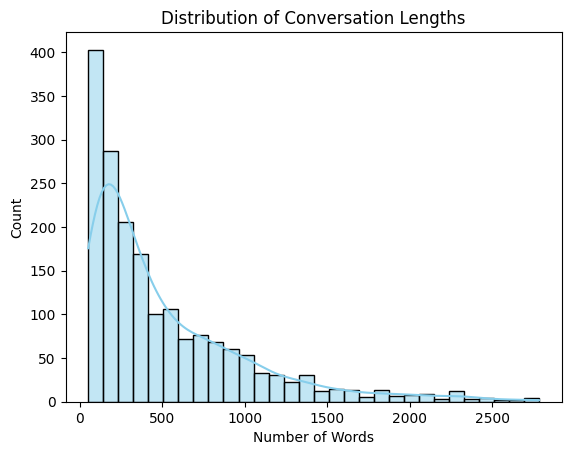

In [ ]:
sns.histplot(df['total_words'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of Conversation Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()

#### Boxplot – Conversation Length by Age *Group*

/tmp/ipython-input-1560209389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_bin_readable', y='total_words', data=df, palette='Set2')


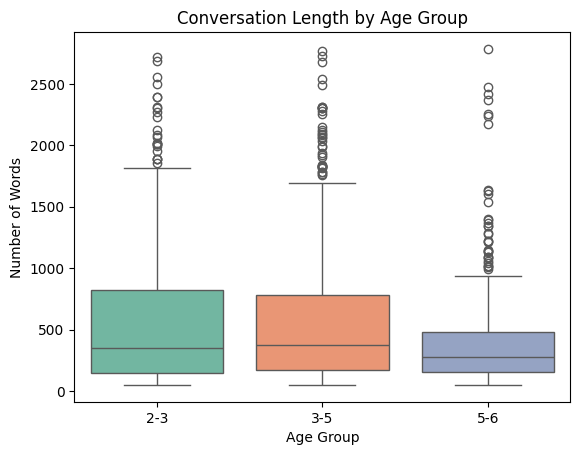

In [ ]:
sns.boxplot(x='age_bin_readable', y='total_words', data=df, palette='Set2')
plt.title("Conversation Length by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Words")
plt.show()

#### Word Cloud Most Common Words

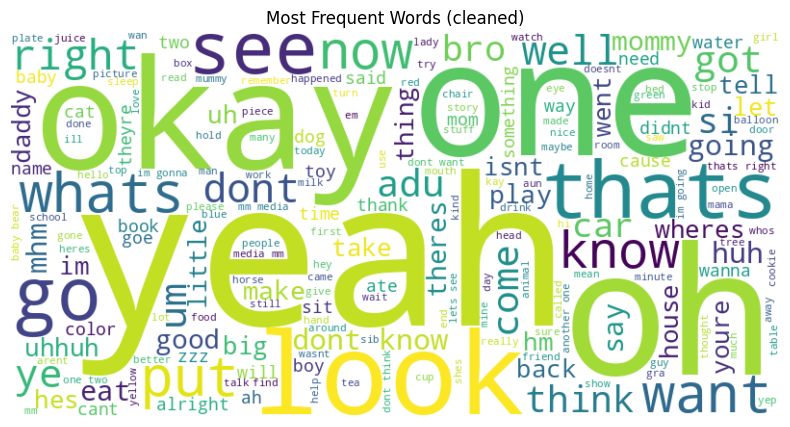

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import string

# Combine all conversation text
text = ' '.join(df['conversation'].astype(str)).lower()

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(['unrecognizedword', 'chi', 'mot', 'inv', 'fat'])

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words (cleaned)")
plt.show()

### Data Cleaning

#### Keep only relevant columns for age_bin prediction

In [ ]:
import ast

# Convert conversation strings to real list of tuples
df['conversation'] = df['conversation'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Then use the feature function
def compute_features(conv):
    if not isinstance(conv, list):
        return pd.Series([0, 0, 0, 0, 0.0])

    # Each tuple is a line: (speaker, text)
    lines = conv
    num_lines = len(lines)
    num_child_lines = sum(1 for spk, _ in lines if spk=='CHI')
    total_words = sum(len(text.split()) for _, text in lines)
    total_child_words = sum(len(text.split()) for spk, text in lines if spk=='CHI')
    avg_child_words_per_line = total_child_words / num_child_lines if num_child_lines > 0 else 0

    return pd.Series([num_lines, num_child_lines, total_words, total_child_words, avg_child_words_per_line])

df[['num_lines', 'num_child_lines', 'total_words', 'total_child_words', 'avg_child_words_per_line']] = df['conversation'].apply(compute_features)

print(df[['num_lines', 'num_child_lines', 'total_words', 'total_child_words', 'avg_child_words_per_line']])

      num_lines  num_child_lines  total_words  total_child_words  \
0         922.0            502.0       4419.0             2174.0   
1         193.0             67.0        634.0              185.0   
2         494.0            254.0       1752.0              750.0   
3          94.0             40.0        437.0              149.0   
4          30.0              9.0        226.0               98.0   
...         ...              ...          ...                ...   
1826      242.0             61.0       1249.0              135.0   
1827       86.0             30.0        233.0               71.0   
1828      476.0            177.0       2193.0              323.0   
1829      469.0            117.0       1185.0              218.0   
1830      366.0             93.0       1105.0              273.0   

      avg_child_words_per_line  
0                     4.330677  
1                     2.761194  
2                     2.952756  
3                     3.725000  
4                 

In [ ]:
# Select columns that help the model understand the conversation
df_final = df[[
    'conversation',
    'child_age',
    'child_gender',
    'num_lines',
    'num_child_lines',
    'total_words',
    'total_child_words',
    'avg_child_words_per_line',
    'age_bin_readable',
]]

# Reset index
df_final = df_final.reset_index(drop=True)

# Check result
print("Dataset shape after column selection:", df_final.shape)
print(df_final.head())

Dataset shape after column selection: (1831, 9)
                                        conversation  child_age child_gender  \
0  [(INV, this is something my sister got for chr...       61.0       female   
1  [(MOT, look Lovey), (CHI, what?), (MOT, look),...       30.0       female   
2  [(MOT, what've you got there?), (CHI, my open ...       29.0       female   
3  [(INV, okay you can just tell me the story too...       67.0       female   
4  [(EXP, okay this is Julia and Deborah for the ...       71.0       female   

   num_lines  num_child_lines  total_words  total_child_words  \
0      922.0            502.0       4419.0             2174.0   
1      193.0             67.0        634.0              185.0   
2      494.0            254.0       1752.0              750.0   
3       94.0             40.0        437.0              149.0   
4       30.0              9.0        226.0               98.0   

   avg_child_words_per_line age_bin_readable  
0                  4.330677      

In [ ]:
print("\nMissing values per column in df_final:")
print(df_final.isna().sum())


Missing values per column in df_final:
conversation                 0
child_age                    0
child_gender                98
num_lines                    0
num_child_lines              0
total_words                  0
total_child_words            0
avg_child_words_per_line     0
age_bin_readable             0
dtype: int64


### Exmaples From DataSet

In [ ]:
import ast

def print_conversation(conv, max_lines=20):
    if isinstance(conv, str):
        try:
            conv = ast.literal_eval(conv)
        except:
            print("Could not parse conversation string")
            return

    for i, (speaker, text) in enumerate(conv):
        if i >= max_lines:
            print("... [truncated]")
            break
        print(f"{speaker}: {text}")


def show_examples_by_age(df, age_bin_readable, n=1, max_lines=20):
    samples = df[df['age_bin_readable'] == age_bin_readable].sample(n)
    for idx, row in samples.iterrows():
        print(f"\n--- Example from age_group {age_bin_readable}, child_age={row['child_age']} ---")
        print_conversation(row['conversation'], max_lines=max_lines)

In [ ]:
show_examples_by_age(df, "2-3", n=1, max_lines=10000)


--- Example from age_group 2-3, child_age=26.0 ---
MOT: okay
MOT: how you doin?
MOT: Nanette , if you look underneath your hamburg , you'll find some catsup
MOT: okay?
JAN: UNRECOGNIZED_WORD
MOT: Janet already had her supper but she's gonna visit and have some punch
MOT: is that okay?
MOT: huh?
CHI: me?
MOT: what?
CHI: me
FAT: what's that?
MOT: ssh
MOT: I didn't hear what you said
MOT: ah
CHI: she's gonna eat wif me
MOT: yes , she is gonna eat with us
FAT: yeah
MOT: you know what you need?
FAT: she's gonna sit
MOT: you forgot your apron
MOT: punky , you forgot your apron
MOT: here
MOT: we didn't do a very good job washing this today
MOT: hold over
MOT: okay
MOT: it's really very dirty
FAT: it's supposed to be very dirty
MOT: Nanette , there's I
MOT: there's catsup under the hamburger if you look carefully
MOT: okay , would you like to try some of this?
CHI: yeah
MOT: these
MOT: do you know what they are?
CHI: pickles
MOT: nope
MOT: these are called Brussel sprouts
MOT: and when you
MO

In [ ]:
show_examples_by_age(df, "3-5", n=1, max_lines=10000)


--- Example from age_group 3-5, child_age=41.0 ---
ANT: where's the toys
CHI: they're all put away
CHI: not going to play with them now
CHI: UNRECOGNIZED_WORD
ANT: Mum Gary won't let me play with toys
LYN: oh look at that aeroplane
CHI: give me it
CHI: give me it
MOT: no you've got the ball
CHI: no
MOT: that's what Tracy made at school
CHI: yes
CHI: she made that
CHI: don't spit on it or else cause it's made with paint
CHI: it goes oh oh bang
CHI: Mum will you do me a kite and a balloon and children
CHI: bang bang
CHI: down he went
CHI: come on then Charlie
CHI: don't go in there
MOT: shut up
CHI: no
CHI: they've got some piece
CHI: come and see
CHI: I saw them
ANT: they've all gone piece
CHI: there's a piece
CHI: I knows
CHI: let's see in here
CHI: I'll go n there
CHI: we'll go in there
CHI: come and see
CHI: come and see
ANT: where are your toys?
CHI: what?
ANT: where's your toy toys?
CHI: where's the aeroplane?
ANT: I don't know
CHI: no
CHI: poor toy toy get dirty
ANT: what
CHI: he

In [ ]:
show_examples_by_age(df, "5-6", n=1, max_lines=10000)


--- Example from age_group 5-6, child_age=62.0 ---
MOT: okay
MOT: should we start?
MOT: oh are you sleepy?
MOT: let's start with the book , and I'll read you a story , okay?
CHI: what else is in there?
MOT: well then we'll play with this , uh , truck
CHI: let me see
CHI: lift me up
MOT: see , then we'll play with the truck
MOT: and then we'll play with the store okay?
MOT: now where would you like to sit?
MOT: would you like to sit in the chair or would you like to sit on the uh
CHI: hm
MOT: on the bottom there?
CHI: I'll sit here
MOT: maybe you wanna move this chair a little bit closer in here
CHI: why?
MOT: okay?
CHI: why?
MOT: cause they like they wanna have you on this little mat here , okay?
CHI: mhm
MOT: move your chair on the mat
CHI: it's heavy
MOT: oh , okay
CHI: wait
CHI: s wait
MOT: okay UNRECOGNIZED_WORD
CHI: it's not a UNRECOGNIZED_WORD, it's not all
CHI: wait
CHI: um, there
MOT: can you smooth the mat out a little bit now?
CHI: mhm
MOT: there
CHI: whoops
CHI: it ripped
M

## Text Preprocessing

### Parse the conversation

In [ ]:
import ast

def add_conversation_json_column(df, col_name='conversation', new_col_name='conversation_json'):
    """
    Add a new column to the dataframe with conversations converted from string to list of tuples.

    Parameters:
    - df: pandas DataFrame
    - col_name: name of the original column containing conversation strings
    - new_col_name: name of the new column to store parsed conversations

    Returns:
    - df: DataFrame with new column
    """
    def safe_eval(conv_str):
        try:
            return ast.literal_eval(conv_str)
        except:
            return []  # return empty list if parsing fails

    df[new_col_name] = df[col_name].apply(safe_eval)
    return df

# Usage
df = add_conversation_json_column(df, 'conversation', 'conversation_json')

# Check
print(df[['conversation', 'conversation_json']].head())
print(type(df['conversation_json'].iloc[0]))  # should be list

                                        conversation  \
0  [('INV', 'this is something my sister got for ...   
1  [('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...   
2  [('MOT', "what've you got there?"), ('CHI', 'm...   
3  [('INV', 'okay you can just tell me the story ...   
4  [('EXP', 'okay this is Julia and Deborah for t...   

                                   conversation_json  
0  [(INV, this is something my sister got for chr...  
1  [(MOT, look Lovey), (CHI, what?), (MOT, look),...  
2  [(MOT, what've you got there?), (CHI, my open ...  
3  [(INV, okay you can just tell me the story too...  
4  [(EXP, okay this is Julia and Deborah for the ...  
<class 'list'>


## Feature engineering

#### Participation Features

**Child participation ratio**

In [ ]:
df['child_participation'] = df['num_child_lines'] / df['num_lines']

**Child word ratio**

In [ ]:
df['child_word_ratio'] = df['total_child_words'] / df['total_words']

#### Lexical Diversity Features
measure vocabulary richness, can indicate developmental stage.

In [ ]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15418 sha256=b064c3065196b159749471ce7fd78589cb739eaa4a75de90c69b91033020c0ae
  Stored in directory: /root/.cache/pip/wheels/eb/40/d0/053edb84485f223effdbf0f91fc2b6ec6fc6cf2230aadca09a
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness

In [ ]:
def compute_lexical_feature(conversation, feature='mtld'):
    """
    Compute a lexical diversity feature for child utterances.

    Parameters:
    - conversation: list of tuples (speaker, line)
    - feature: string, one of ['mtld', 'vocd', 'mattr']

    Returns:
    - float: the feature value
    """
    # Filter only child lines
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']
    text = " ".join(child_lines)

    lex = LexicalRichness(text)

    # Return the requested feature
    if feature == 'mtld':
        return lex.mtld()
    elif feature == 'vocd':
        return lex.vocd()
    elif feature == 'mattr':
        return lex.mattr()
    else:
        raise ValueError(f"Unknown feature: {feature}")

##### **Measure of Textual Lexical Diversity (MTLD)**<br>
MTLD quantifies how lexically diverse a child’s language is over stretches of text.

It calculates **how long a child can keep speaking before repeating words** too often.

Higher numbers → the child uses more unique words over longer sequences, indicating richer vocabulary.

Lower numbers → words are repeated more frequently, showing less lexical diversity.

In [ ]:
df['mtld'] = df['conversation_json'].apply(lambda x: compute_lexical_feature(x, 'mtld'))

In [ ]:
df.groupby('age_bin_readable')['mtld'].describe()

/tmp/ipython-input-631369773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['mtld'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,16.319894,6.887494,3.828571,11.156169,15.319603,20.304432,48.795622
3-5,847.0,24.185018,9.784929,4.689542,17.623547,23.046007,28.544851,89.164539
5-6,460.0,28.286287,10.480788,3.636364,21.035159,26.426904,33.155392,90.217742


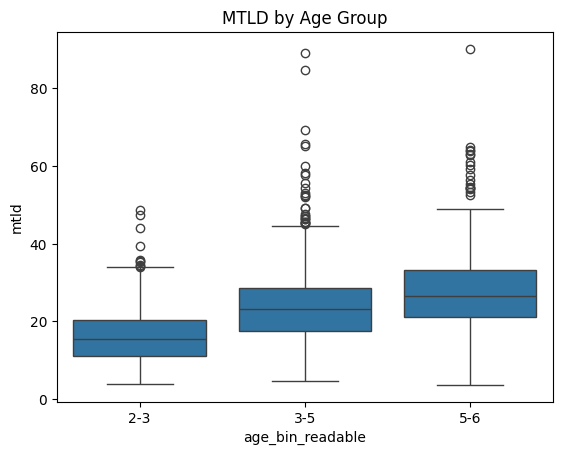

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='age_bin_readable', y='mtld', data=df)
plt.title("MTLD by Age Group")
plt.show()

The MTLD feature shows a clear developmental trend: younger children (ages 2–3) have lower MTLD values, reflecting more repetitive and limited vocabulary, while older children (ages 5–6) show higher MTLD values, indicating a richer and more varied vocabulary. This aligns with expectations from child language development and supports the validity of MTLD as a feature for age prediction.

##### **Measure D (vocd)**
Measure D captures **how quickly a child introduces new words** as they speak.

It fits a stochastic curve to the text to model the probability that the next word is unique.

Higher numbers → the child introduces new words more rapidly, indicating higher lexical richness.

Lower numbers → vocabulary growth slows down, showing more repetition.

In [ ]:
df['vocd'] = df['conversation_json'].apply(lambda x: compute_lexical_feature(x, 'vocd'))

In [ ]:
df.groupby('age_bin_readable')['vocd'].describe()

/tmp/ipython-input-2681074513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['vocd'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,37.005211,18.784991,1.277081,21.197485,35.924126,50.153226,91.451401
3-5,847.0,48.642633,20.292291,1.498619,32.769296,49.405461,62.580027,108.993292
5-6,460.0,49.409179,20.634853,5.704418,32.405914,48.422494,65.157617,102.334844


The vocd feature demonstrates a clear developmental trend across age groups. Younger children (ages 2–3) have lower vocd values (mean ≈ 37), reflecting slower introduction of new words and more repetition, whereas older children (ages 3-5) show higher vocd values (mean ≈ 48), indicating faster vocabulary growth and richer lexical diversity. The maximum values (up to ≈ 109) highlight variability across children, but the overall trend aligns with expectations from child language development, supporting vocd as a valid feature for age prediction.

##### **Moving-Average Type-Token Ratio (MATTR)**
MATTR measures lexical diversity by averaging the Type-Token Ratio (TTR) over a fixed-length window of text.

It smooths out fluctuations caused by sample length, providing a more stable estimate of vocabulary richness.

Higher numbers → the child consistently uses a wide range of unique words across the text.

Lower numbers → the child repeats words more frequently, indicating lower lexical diversity.

In [ ]:
from lexicalrichness import LexicalRichness

def compute_mattr(conversation, window_size=20):
    # Extract child utterances
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']
    text = " ".join(child_lines)

    lex = LexicalRichness(text)

    # Use a smaller window if text is shorter
    if len(text.split()) < window_size:
        window_size = len(text.split())

    return lex.mattr(window_size=window_size)

In [ ]:
df['mattr'] = df['conversation_json'].apply(lambda x: compute_mattr(x, window_size=20))

In [ ]:
df.groupby('age_bin_readable')['mattr'].describe()

/tmp/ipython-input-4140726011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['mattr'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,0.684871,0.087561,0.250870,0.639159,0.702810,0.746304,0.858824
3-5,847.0,0.753887,0.068116,0.300794,0.722751,0.764130,0.796976,0.934167
5-6,460.0,0.780485,0.055547,0.399180,0.747441,0.785699,0.816100,0.914706


need to edittttt
**bold text**

Children aged 2–3 tend to have lower scores, showing that they repeat words more often and use a smaller set of vocabulary. As children get older, the scores steadily increase, with those aged 5–6 demonstrating the highest values, indicating they use a wider variety of words with less repetition. The spread of values (from minimum to maximum) also suggests that while some younger children occasionally show more varied language, older children generally sustain richer and more diverse utterances throughout their conversations. Overall, MATTR effectively captures the growth in lexical richness as children develop.

#### Morphological Complexity

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

##### **Mean Length of Utterance in Morphemes (MLUm)**</br>
MLUm measures the average number of morphemes per child utterance. A morpheme is the smallest unit of meaning, such as a word stem or grammatical marker (e.g., “walked” → “walk” + “-ed”). Higher MLUm values indicate that a child produces longer, more complex utterances, reflecting more advanced grammatical development. Lower MLUm values suggest shorter, simpler speech, typical of younger or less linguistically mature children. This feature captures the development of morphological and syntactic complexity in spontaneous speech and is robust across different sample lengths.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def compute_mlum(conversation):
    """
    Computes Mean Length of Utterance in Morphemes (MLUm) for a child.
    conversation: list of tuples [(speaker, utterance), ...]
    """
    child_utterances = [line for speaker, line in conversation if speaker == 'CHI']

    if not child_utterances:
        return 0

    morpheme_counts = []

    for utterance in child_utterances:
        words = word_tokenize(utterance)
        morpheme_counts.append(len(words))

    mlu_m = sum(morpheme_counts) / len(morpheme_counts)

    return mlu_m

df['mlum'] = df['conversation_json'].apply(compute_mlum)

df[['conversation_json', 'mlum']].head()

,conversation_json,mlum
0,"[(INV, this is something my sister got for chr...",4.794821
1,"[(MOT, look Lovey), (CHI, what?), (MOT, look),...",3.149254
2,"[(MOT, what've you got there?), (CHI, my open ...",3.232283
3,"[(INV, okay you can just tell me the story too...",4.225000
4,"[(EXP, okay this is Julia and Deborah for the ...",10.888889


In [ ]:
df.groupby('age_bin_readable')['mlum'].describe()

/tmp/ipython-input-1032476869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['mlum'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,2.873527,0.819056,1.285714,2.275499,2.832051,3.350870,6.390244
3-5,847.0,3.967906,1.457217,1.215686,3.026999,3.704348,4.534183,15.000000
5-6,460.0,4.703485,1.732663,1.473684,3.610609,4.263846,5.465596,21.100000


Younger children (ages 2–3) produce shorter utterances with fewer morphemes, reflecting simpler sentence structures. As children grow older, MLUm values increase, indicating that their utterances become longer and morphologically more complex. The maximum values also rise with age, showing that some older children can produce very long and detailed utterances. This pattern aligns with expectations from typical language development and supports MLUm as a valid measure of morphological complexity.


##### **Kolmogorov Complexity (KC)**


In [ ]:
import zlib

def compute_kc(conversation):
    """
    Estimate Kolmogorov Complexity of a conversation.
    We concatenate all child utterances and compress the text.
    The length of the compressed text is used as a complexity measure.
    """
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']

    text = " ".join(child_lines)

    # Encode to bytes
    text_bytes = text.encode('utf-8')

    # Compress using zlib
    compressed = zlib.compress(text_bytes)

    return len(compressed)

df['kc'] = df['conversation_json'].apply(compute_kc)

In [ ]:
df.groupby('age_bin_readable')['kc'].describe()

/tmp/ipython-input-464762450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['kc'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,999.433206,855.795785,128.0,312.75,719.5,1452.0,4390.0
3-5,847.0,1031.528926,819.098625,106.0,394.00,776.0,1451.5,4570.0
5-6,460.0,785.917391,686.561206,141.0,351.00,562.0,970.0,4612.0


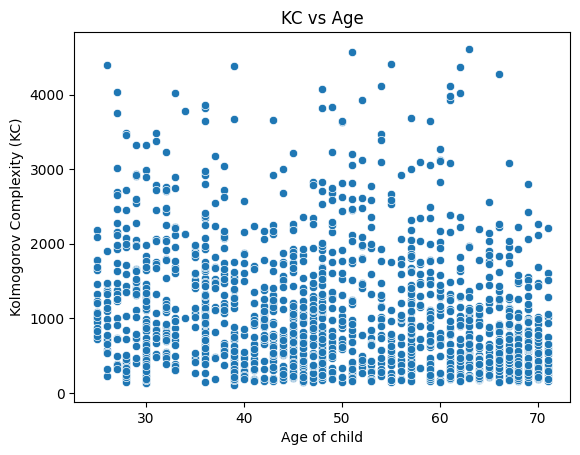

Pearson correlation: -0.062, p-value: 0.00756
Spearman correlation: -0.027, p-value: 0.254


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 1. Quick scatterplot
sns.scatterplot(x='child_age', y='kc', data=df)
plt.xlabel("Age of child")
plt.ylabel("Kolmogorov Complexity (KC)")
plt.title("KC vs Age")
plt.show()

# 2. Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(df['child_age'], df['kc'])

# 3. Spearman correlation (monotonic relationship, not necessarily linear)
spearman_corr, spearman_p = spearmanr(df['child_age'], df['kc'])

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3g}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3g}")

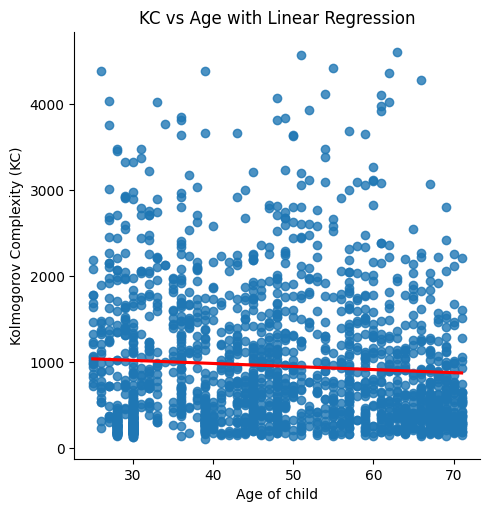

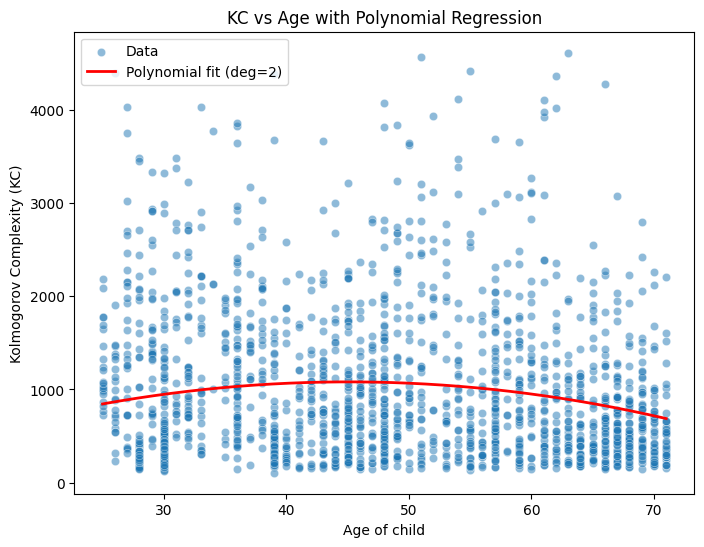

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Scatterplot with linear regression line
sns.lmplot(x='child_age', y='kc', data=df, ci=None, line_kws={'color': 'red'})
plt.xlabel("Age of child")
plt.ylabel("Kolmogorov Complexity (KC)")
plt.title("KC vs Age with Linear Regression")
plt.show()

# 2. Scatterplot with polynomial regression (degree 2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='child_age', y='kc', data=df, alpha=0.5, label="Data")

# Fit polynomial regression
z = np.polyfit(df['child_age'], df['kc'], 2)  # degree 2 polynomial
p = np.poly1d(z)

# Generate smooth curve
xp = np.linspace(df['child_age'].min(), df['child_age'].max(), 200)
plt.plot(xp, p(xp), 'r-', linewidth=2, label="Polynomial fit (deg=2)")

plt.xlabel("Age of child")
plt.ylabel("Kolmogorov Complexity (KC)")
plt.title("KC vs Age with Polynomial Regression")
plt.legend()
plt.show()


Normalization Process

In [ ]:
df['total_child_words'] = df['conversation_json'].apply(lambda conv: sum(len(line.split()) for speaker,line in conv if speaker=='CHI'))
df['kc_per_word'] = df['kc'] / df['total_child_words']
df['kc_per_line'] = df['kc'] / df['conversation_json'].apply(lambda conv: sum(1 for speaker,_ in conv if speaker=='CHI'))

We computed these normalized features to make the Kolmogorov complexity values comparable across children and utterances of varying lengths. Since longer conversations or utterances naturally yield higher raw complexity scores, dividing by the total number of words (kc_per_word) and by the number of lines (kc_per_line) ensures that the measure reflects complexity per unit of speech, rather than simply length. This normalization allows us to meaningfully compare linguistic complexity across children of different ages and conversation sizes, providing a feature that can be used directly in predictive models or developmental analyses. By including these features, we capture not only the richness of individual words but also how children combine them in utterances, giving a fuller picture of language development.

In [ ]:
df.groupby('age_bin_readable')[['kc_per_word', 'kc_per_line']].describe()

/tmp/ipython-input-3541985840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')[['kc_per_word', 'kc_per_line']].describe()


kc_per_word                                          \
                       count      mean       std       min       25%   
age_bin_readable                                                       
2-3                    524.0  2.035077  0.406389  1.047379  1.739403   
3-5                    847.0  2.141445  0.409984  1.129596  1.863133   
5-6                    460.0  2.203717  0.408725  1.455213  1.938561   

                                               kc_per_line            \
                       50%       75%       max       count      mean   
age_bin_readable                                                       
2-3               1.950271  2.263545  3.460317       524.0  5.068246   
3-5               2.067742  2.376676  3.912281       847.0  7.341190   
5-6               2.137847  2.373316  3.666667       460.0  9.282273   

                                                                                
                       std       min       25%       50%        75%        max  
age_bin_readable                                                                
2-3               1.356599  1.618380  4.147428  5.000000   5.881908  13.894737  
3-5               2.761605  2.765625  5.767189  6.815385   8.057566  38.500000  
5-6               3.605257  3.810811  7.046870  8.177198  10.778986  39.400000

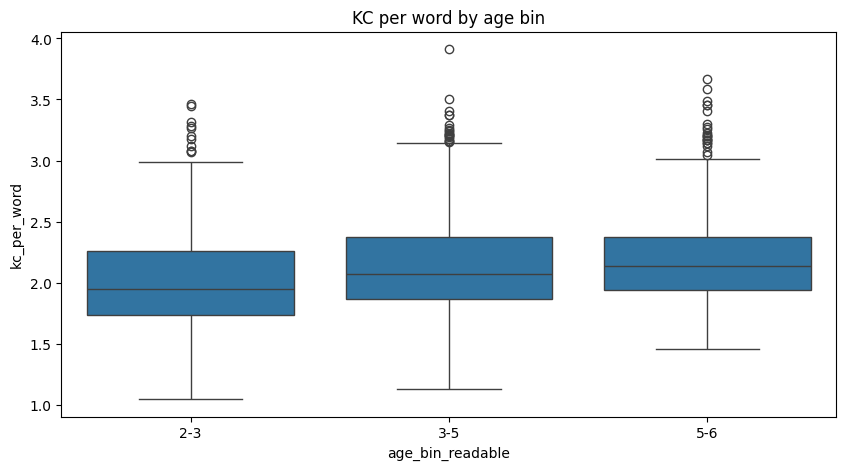

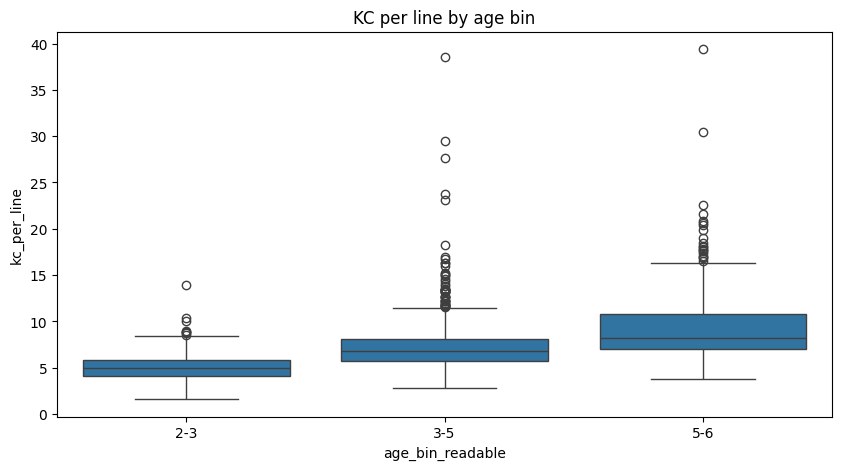

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='age_bin_readable', y='kc_per_word', data=df)
plt.title('KC per word by age bin')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='age_bin_readable', y='kc_per_line', data=df)
plt.title('KC per line by age bin')
plt.show()


The values of **kc_per_word** and **kc_per_line** reflect the morphological and utterance-level complexity of children’s speech. kc_per_word measures the average complexity of individual words, while kc_per_line captures the overall complexity of entire utterances. As seen in the results, kc_per_word gradually increases with age, indicating that older children tend to use slightly more complex words. Meanwhile, kc_per_line shows a stronger increase across age groups, reflecting that older children produce longer and more syntactically complex utterances. The growing standard deviation for kc_per_line suggests greater variability in the complexity of utterances among older children, consistent with the natural development of expressive language skills.

#### Syntactic Complexity

##### **Clause Density**</br>
Clause Density is a measure of syntactic complexity that calculates the number of clauses per communication unit (sometimes called the subordination index). A clause is a part of a sentence that contains a subject and a predicate.

The basic idea is that older children or more advanced speakers tend to produce sentences with more subordinate clauses, such as "I went home because it was raining" or "She said that she would come." Higher clause density indicates more complex syntactic production, often found in narrative or expository speech compared to simple conversational speech.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
import spacy

def count_clauses_spacy(utterance):
    """Count clauses using dependency parsing."""
    doc = nlp(utterance)
    clauses = 0
    for token in doc:
        # 'advcl', 'ccomp', 'xcomp' are common clause types in spaCy
        if token.dep_ in ('advcl', 'ccomp', 'xcomp', 'relcl'):
            clauses += 1
    # At least one clause per utterance
    return max(1, clauses)

def compute_clause_density_spacy(conversation):
    child_utterances = [line for speaker, line in conversation if speaker == 'CHI']
    if not child_utterances:
        return 0
    total_clauses = sum(count_clauses_spacy(utt) for utt in child_utterances)
    total_lines = len(child_utterances)
    return total_clauses / total_lines

# Add feature to DataFrame
df['clause_density'] = df['conversation_json'].apply(compute_clause_density_spacy)

In [ ]:
file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_fe.csv"

df.to_csv(file_path, index=False)

In [ ]:
df.groupby('age_bin_readable')['clause_density'].describe()

/tmp/ipython-input-3526256849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin_readable')['clause_density'].describe()


,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,1.006830,0.014213,1.0,1.0,1.000000,1.008382,1.114094
3-5,847.0,1.023284,0.036898,1.0,1.0,1.011236,1.030173,1.315287
5-6,460.0,1.033709,0.070619,1.0,1.0,1.017192,1.039280,2.100000


For ages 2–3, clause density is ~1.0, meaning almost all utterances are single-clause.

From 3–6 years, the mean clause density gradually increases (up to ~1.03), showing that children begin to produce more multi-clause sentences as they get older.

The standard deviation and maximum values grow with age, which suggests that while most utterances remain simple, older children sometimes produce much more complex sentences.

In short: The results show a developmental trend as children grow, their sentence structures become slightly but consistently more complex, with greater variation among older children.

##### **Index of Productive Syntax**
Index of Productive Syntax (IPSyn) is a measure of a child’s syntactic complexity. It is calculated by identifying and counting specific syntactic structures, such as noun phrases, verb phrases, questions, and basic sentence constructions.

The idea is that the more varied syntactic structures a child uses, the higher the IPSyn score – indicating more advanced grammatical abilities. This provides a direct measure of a child’s syntactic development, especially for children over 3 years old, and is more informative than Mean Length of Utterance (MLUm) for older children.

In [ ]:
import re

# Define example syntactic patterns to approximate IPSyn
noun_phrases = [
    r"\b(my|your|his|her|our|their|the|a|an)\s+\w+",  # Noun phrases with determiners
]

verb_phrases = [
    r"\b(is|are|was|were|be|have|has|had|do|does|did|can|will|shall|may|must)\s+\w+",  # Simple verb phrases
]

questions = [
    r"\b(who|what|where|when|why|how)\b",  # Question words
]

sentence_structures = [
    r"\b\w+ \w+ \w+",  # Simple sentences of at least 3 words
]

def compute_ipsyn(conversation):
    """
    Approximates IPSyn score for a child in a conversation.
    conversation: list of tuples [(speaker, utterance), ...]
    Returns a numeric score representing syntactic complexity.
    """
    # Extract only child utterances
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']
    text = " ".join(child_lines).lower()

    score = 0

    # Count matches for each syntactic category
    for pattern in noun_phrases:
        score += len(re.findall(pattern, text))

    for pattern in verb_phrases:
        score += len(re.findall(pattern, text))

    for pattern in questions:
        score += len(re.findall(pattern, text))

    for pattern in sentence_structures:
        score += len(re.findall(pattern, text))

    return score

# Apply the IPSyn approximation to your dataset
df['ipsyn'] = df['conversation_json'].apply(compute_ipsyn)

In [ ]:
df.groupby('age_bin_readable')['ipsyn'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,240.041985,240.704023,16.0,56.0,153.0,344.0,1248.0
3-5,847.0,246.110980,235.150034,16.0,74.0,160.0,351.0,1385.0
5-6,460.0,175.028261,175.062968,17.0,67.0,125.5,209.0,1213.0


In [ ]:
df['ipsyn_per_word'] = df['ipsyn'] / df['total_child_words']
df['ipsyn_per_turn'] = df['ipsyn'] / df['num_child_turns']

df['ipsyn_zscore'] = (df['ipsyn'] - df['ipsyn'].mean()) / df['ipsyn'].std()

In [ ]:
df.groupby('age_bin_readable')[['ipsyn_per_word','ipsyn_per_turn']].describe()

ipsyn_per_word                                          \
                          count      mean       std       min       25%   
age_bin_readable                                                          
2-3                       524.0  0.409630  0.054182  0.217949  0.372649   
3-5                       847.0  0.440566  0.045832  0.209581  0.413521   
5-6                       460.0  0.446988  0.047918  0.309524  0.419840   

                                               ipsyn_per_turn            \
                       50%       75%       max          count      mean   
age_bin_readable                                                          
2-3               0.417563  0.449311  0.548387          524.0  1.068029   
3-5               0.441065  0.466667  0.656250          847.0  1.567895   
5-6               0.445286  0.473051  0.632653          460.0  1.960737   

                                                                               
                       std       min       25%       50%       75%        max  
age_bin_readable                                                               
2-3               0.394995  0.309091  0.769079  1.046156  1.327579   2.902439  
3-5               0.659552  0.359375  1.136989  1.464115  1.845893   7.500000  
5-6               0.918918  0.447368  1.379464  1.736416  2.375738  10.100000

Both normalized measures (per_word and per_turn) are more informative than raw ipsyn, because they account for how much the child speaks.

ipsyn_per_turn shows the biggest age-related differences, making it a good feature for models predicting language development.

#### Discourse & Pragmatic

##### **Narrative Complexity**
italicized textNarrative Complexity measures a child’s ability to produce coherent and structured language in storytelling. It reflects the use of story grammar elements, such as:

*  Settings
*  Initiating events
*  Consequences
*  Connectives (e.g., “because,” “then,” “so”)

High narrative complexity indicates more coherent and structured language, typical of older children and richer narratives. It is useful for assessing discourse and pragmatic development, beyond simple sentence-level metrics.

In [ ]:
import spacy
import pandas as pd

connectives = [
    "because", "although", "if", "when", "while", "since", "after", "before", "though", "as",
    "then", "so", "therefore", "hence", "but", "and", "or"
]

# Function to compute narrative complexity per conversation
def compute_narrative_complexity(conversation):
    """
    Count the number of narrative connectives and story elements in a child's utterances.
    conversation: list of tuples [(speaker, utterance), ...]
    """
    # Keep only child utterances
    child_lines = [line for speaker, line in conversation if speaker == "CHI"]
    if not child_lines:
        return 0

    text = " ".join(child_lines)
    doc = nlp(text)

    # Count tokens that are connectives
    count_connectives = sum(1 for token in doc if token.text.lower() in connectives)

    # Optional: divide by total tokens or lines to normalize
    total_tokens = len(doc)
    if total_tokens == 0:
        return 0

    narrative_score = count_connectives / total_tokens  # proportion of narrative connectives
    return narrative_score

# Apply to the dataset
df['narrative_complexity'] = df['conversation_json'].apply(compute_narrative_complexity)

In [ ]:
df.groupby('age_bin_readable')['narrative_complexity'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,0.012017,0.015109,0.0,0.000000,0.007067,0.018815,0.133075
3-5,847.0,0.037911,0.037492,0.0,0.014085,0.027140,0.048480,0.232558
5-6,460.0,0.066663,0.066516,0.0,0.020025,0.037431,0.091578,0.280000


The results show a developmental trend narrative complexity increases with age, which matches what we know from child language acquisition research. Children move from simple, disconnected utterances toward structured storytelling with story grammar elements (setting, events, consequences).

##### **Turn-Taking**
Turn-Taking is a discourse and pragmatic feature that captures a child’s conversational coordination. It measures how children participate in dialogue, including metrics like:

Rate of turns per minute: How often a child contributes to the conversation.

Mean length of a turn: Average number of words the child speaks per turn.

Turn-taking is a sophisticated social skill that develops with age. It relies on cues such as intonation, filled pauses, and sentence completeness. High turn-taking ability reflects better conversational engagement and pragmatic competence.

In [ ]:
import numpy as np

def compute_turn_taking(conversation):
    """
    Computes turn-taking metrics for a conversation:
    - num_turns: number of child turns
    - avg_turn_length: average words per child turn
    """
    child_turns = [line for speaker, line in conversation if speaker == 'CHI']
    num_turns = len(child_turns)
    if num_turns == 0:
        avg_turn_length = 0
    else:
        avg_turn_length = np.mean([len(line.split()) for line in child_turns])
    return pd.Series({'num_child_turns': num_turns, 'avg_child_turn_length': avg_turn_length})

turn_features = df['conversation_json'].apply(compute_turn_taking)
df = pd.concat([df, turn_features], axis=1)


In [ ]:
df.groupby('age_bin_readable')[['num_child_turns', 'avg_child_turn_length']].mean()

,num_child_turns,avg_child_turn_length
age_bin_readable,,
2-3,208.555344,2.551878
3-5,151.624557,3.524504
5-6,96.430435,4.313665


Number of turns (num_child_turns):

Younger children (2–3 years) have a lot of turns (~208 on average).

As children grow older, the number of turns decreases (down to ~96 for 5–6 years).

Interpretation: younger kids speak in very short turns ("one word", "two words"), so they accumulate many turns. Older children produce longer utterances, so they need fewer turns to express themselves.

Average turn length (avg_child_turn_length):

2–3 years: ~2.5 words per turn.

5–6 years: ~4.3 words per turn.

Interpretation: turn length steadily increases with age, which reflects more advanced grammar and richer vocabulary.

Overall insight:
Younger children talk often, but briefly. Older children talk less often, but each turn is longer and more complex. This pattern matches known developmental trends in discourse skills.

#### Discourse & Pragmatic

##### **Cohesion and Coherence**
This feature quantifies how connected and understandable a child’s discourse is. Cohesion captures the use of linguistic devices, like connectives (“and”, “because”, “although”), that link ideas across sentences. Coherence reflects how well the ideas are logically and semantically organized, showing that the child maintains a consistent topic or narrative structure. A higher score indicates a more mature and organized discourse, often seen in older children or in narrative storytelling.

In [ ]:
import spacy
from nltk.corpus import stopwords
from collections import Counter

# Make sure stopwords are downloaded
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import spacy
from nltk.corpus import stopwords
from collections import Counter

# Use NLTK English stopwords as a proxy for built-in connectives
CONNECTIVES = set(stopwords.words('english')) & set([
    "and", "but", "or", "if", "because", "although", "when", "while",
    "since", "after", "before", "though", "as", "therefore", "however", "then"
])

def compute_cohesion(conversation):
    child_utterances = [line for speaker, line in conversation if speaker=='CHI']
    if not child_utterances:
        return 0.0

    total_words = 0
    total_connectives = 0
    overlap_score = 0.0

    previous_words = set()
    for utt in child_utterances:
        doc = nlp(utt)
        words = [token.lemma_.lower() for token in doc if token.is_alpha]
        total_words += len(words)
        total_connectives += sum(1 for w in words if w in CONNECTIVES)

        # Lexical overlap with previous utterance
        if previous_words:
            common = set(words) & previous_words
            if words:
                overlap_score += len(common) / len(words)
        previous_words = set(words)

    connective_score = total_connectives / total_words if total_words > 0 else 0
    avg_overlap_score = overlap_score / (len(child_utterances) - 1) if len(child_utterances) > 1 else 0

    cohesion_score = 0.5 * connective_score + 0.5 * avg_overlap_score
    return cohesion_score

# Add feature to DataFrame
df['cohesion'] = df['conversation_json'].apply(compute_cohesion)

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_fe_2.csv"
df = pd.read_csv(file_path)

In [ ]:
df.groupby('age_bin_readable')['cohesion'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,0.095763,0.035025,0.005682,0.071850,0.092873,0.115225,0.232569
3-5,847.0,0.095456,0.041486,0.000000,0.068065,0.088944,0.114214,0.261817
5-6,460.0,0.108934,0.057059,0.012241,0.068621,0.092502,0.134210,0.317668


Mean cohesion increases with age, showing older children produce more connected and organized speech.

Variability grows with age, indicating more individual differences in speech coherence.

Useful feature for age prediction, as it reflects developmental changes in discourse organization.

#### Acoustic & Phonological

##### **Speaking Rate and Utterance Length** </br>
This feature measures the temporal and structural aspects of a child’s speech. Speaking rate is approximated as the number of words per utterance, while utterance length captures how many words are used in each turn. Young children typically produce shorter and slower utterances, reflecting early stages of speech development. As children grow, their utterances become longer and their speaking rate increases, making this feature a reliable indicator of linguistic and cognitive maturation.

In [ ]:
import numpy as np

def compute_speaking_rate_and_length(conversation):
    """
    Compute speaking rate and utterance length features from child utterances.

    Parameters:
    - conversation: list of tuples (speaker, line)

    Returns:
    - dict with MLU, max_utt_len, speaking_rate
    """
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']

    if not child_lines:
        return {"MLU": 0, "max_utt_len": 0, "speaking_rate": 0}

    lengths = [len(line.split()) for line in child_lines if line.strip()]

    if not lengths:
        return {"MLU": 0, "max_utt_len": 0, "speaking_rate": 0}

    mlu = float(np.mean(lengths))

    max_len = int(np.max(lengths))

    speaking_rate = mlu

    return {
        "MLU": mlu,
        "max_utt_len": max_len,
        "speaking_rate": speaking_rate
    }

In [ ]:
df["speaking_features"] = df["conversation_json"].apply(compute_speaking_rate_and_length)

df["MLU"] = df["speaking_features"].apply(lambda x: x["MLU"])
df["max_utt_len"] = df["speaking_features"].apply(lambda x: x["max_utt_len"])
df["speaking_rate"] = df["speaking_features"].apply(lambda x: x["speaking_rate"])

In [ ]:
df.groupby('age_bin_readable')[['MLU', 'max_utt_len', 'speaking_rate']].describe()

MLU                                                    \
                  count      mean       std       min       25%       50%   
age_bin_readable                                                            
2-3               524.0  2.551878  0.732468  1.193548  2.024185  2.488632   
3-5               847.0  3.524504  1.328695  1.117647  2.644999  3.321101   
5-6               460.0  4.313665  1.738064  1.394737  3.187128  3.833167   

                                      max_utt_len             ...              \
                       75%        max       count       mean  ...   75%   max   
age_bin_readable                                              ...               
2-3               2.969678   5.845528       524.0  10.494275  ...  13.0  61.0   
3-5               4.074609  14.250000       847.0  15.122786  ...  18.0  94.0   
5-6               5.069650  20.200000       460.0  15.608696  ...  19.0  62.0   

                 speaking_rate                                          \
                         count      mean       std       min       25%   
age_bin_readable                                                         
2-3                      524.0  2.551878  0.732468  1.193548  2.024185   
3-5                      847.0  3.524504  1.328695  1.117647  2.644999   
5-6                      460.0  4.313665  1.738064  1.394737  3.187128   

                                                 
                       50%       75%        max  
age_bin_readable                                 
2-3               2.488632  2.969678   5.845528  
3-5               3.321101  4.074609  14.250000  
5-6               3.833167  5.069650  20.200000  

[3 rows x 24 columns]

The table summarizes three key speaking features—MLU (Mean Length of Utterance), maximum utterance length, and speaking rate—grouped by age_bin_readable.

MLU: Average number of morphemes per utterance. Increases with age, reflecting longer and more complex speech.

Maximum Utterance Length: Shows the longest single utterance; older children tend to produce longer utterances.

Speaking Rate: Words or morphemes spoken per unit time; generally increases with age as children gain fluency.

Overall, these measures reflect developmental progression in speech production: younger children speak more slowly, with shorter utterances, while older children produce longer and faster speech.

##### **Phonological Development**</br>
This feature reflects how children acquire and master speech sound patterns. In text-based transcripts, it can be approximated by analyzing the diversity and complexity of phoneme usage, the ratio of vowels to consonants, or the presence of simplified forms that replace more complex sounds. Younger children often rely on simpler, vowel-heavy words and show omissions or substitutions, while older children demonstrate a broader phonemic repertoire and more accurate word forms. Tracking these patterns provides valuable insight into the developmental stage of the child’s speech system.

In [ ]:
import re
import numpy as np

def compute_phonological_development(conversation):
    """
    Compute phonological development features from child utterances.

    Parameters:
    - conversation: list of tuples (speaker, line)

    Returns:
    - dict with phonological development features
    """
    # Extract child utterances
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']

    if not child_lines:
        return {
            "avg_word_length": 0,
            "vowel_ratio": 0,
            "cluster_ratio": 0,
            "phoneme_diversity": 0
        }

    words = [w.lower() for line in child_lines for w in line.split()]
    if not words:
        return {
            "avg_word_length": 0,
            "vowel_ratio": 0,
            "cluster_ratio": 0,
            "phoneme_diversity": 0
        }

    avg_word_length = np.mean([len(w) for w in words])

    all_chars = "".join(words)
    vowels = re.findall(r"[aeiou]", all_chars)
    vowel_ratio = len(vowels) / len(all_chars) if all_chars else 0

    cluster_words = [w for w in words if re.search(r"[bcdfghjklmnpqrstvwxyz]{2,}", w)]
    cluster_ratio = len(cluster_words) / len(words)

    phoneme_diversity = len(set(all_chars))

    return {
        "avg_word_length": avg_word_length,
        "vowel_ratio": vowel_ratio,
        "cluster_ratio": cluster_ratio,
        "phoneme_diversity": phoneme_diversity
    }

In [ ]:
df["phonological_features"] = df["conversation_json"].apply(compute_phonological_development)

df["avg_word_length"] = df["phonological_features"].apply(lambda x: x["avg_word_length"])
df["vowel_ratio"] = df["phonological_features"].apply(lambda x: x["vowel_ratio"])
df["cluster_ratio"] = df["phonological_features"].apply(lambda x: x["cluster_ratio"])
df["phoneme_diversity"] = df["phonological_features"].apply(lambda x: x["phoneme_diversity"])

In [ ]:
phonological_summary = df.groupby('age_bin_readable')[
    ['avg_word_length', 'vowel_ratio', 'cluster_ratio', 'phoneme_diversity']
].describe()

print(phonological_summary)

                 avg_word_length                                          \
                           count      mean       std       min       25%   
age_bin_readable                                                           
2-3                        524.0  4.657544  1.009247  3.203046  4.007787   
3-5                        847.0  4.344491  0.771748  3.212544  3.894559   
5-6                        460.0  4.144220  0.491066  3.093750  3.793395   

                                                vowel_ratio            ...  \
                       50%       75%        max       count      mean  ...   
age_bin_readable                                                       ...   
2-3               4.376410  5.003918  11.452381       524.0  0.372538  ...   
3-5               4.149507  4.533466   9.525253       847.0  0.368586  ...   
5-6               4.061442  4.440812   7.710526       460.0  0.366778  ...   

                 cluster_ratio           phoneme_diversity             \
 

These statistics summarize phonological development features across age groups:

Average Word Length: Younger children (2–3) tend to use slightly longer words on average compared to older groups, likely reflecting early attempts at multisyllabic words or repetitions. There’s a slight decrease with age, as vocabulary becomes more varied and efficient.

Vowel Ratio: The proportion of vowels in a child’s speech shows a slight decrease with age, indicating more complex consonant usage and phonological maturation.

Cluster Ratio: The use of consonant clusters increases with age, reflecting the child’s growing mastery of more complex sound combinations.

Phoneme Diversity: The variety of distinct phonemes remains relatively stable, showing consistent development across these age ranges, though slight fluctuations suggest ongoing acquisition of new sounds.

Overall, these features capture how a child’s speech sounds and patterns evolve with age, and they can be used as important indicators in age prediction models.

In [ ]:
phonological_mean = df.groupby('age_bin_readable')[
    ['avg_word_length', 'vowel_ratio', 'cluster_ratio', 'phoneme_diversity']
].mean()

print(phonological_mean)

                  avg_word_length  vowel_ratio  cluster_ratio  \
age_bin_readable                                                
2-3                      4.657544     0.372538       0.452562   
3-5                      4.344491     0.368586       0.467275   
5-6                      4.144220     0.366778       0.488478   

                  phoneme_diversity  
age_bin_readable                     
2-3                       27.914122  
3-5                       28.194805  
5-6                       27.150000  


These values summarize phonological development by age group:

Average Word Length: There is a slight decrease in average word length as children grow older (from 4.66 at 2–3 years to 4.14 at 5–6 years), suggesting that younger children may use longer or repeated words while older children favor shorter, more efficient words.

Vowel Ratio: The proportion of vowels in speech slightly decreases with age, reflecting increased use of consonants and more complex sound patterns.

Cluster Ratio: Consonant cluster usage rises with age (from 0.45 to 0.49), indicating the child’s growing ability to produce more complex phonological structures.

Phoneme Diversity: The number of distinct phonemes remains fairly stable across age groups, reflecting steady acquisition of speech sounds, with small variations due to ongoing learning.

Overall, these metrics capture how a child’s speech complexity evolves with age, providing valuable features for age prediction or developmental analysis.

#### Part-of-Speech & Vocabulary Composition

##### **Noun-to-Verb Ratio** </br>
This feature measures the proportion of nouns to verbs in a child’s language sample. Early in development, children tend to use more nouns than verbs, reflecting the well-known "noun bias." As they grow and their vocabulary expands, they start using more verbs, and the ratio decreases. A higher noun-to-verb ratio typically indicates younger children, while a lower ratio suggests more advanced language development.

In [ ]:
import spacy

def noun_to_verb_ratio(conversation):
    """
    Compute the Noun-to-Verb ratio for a child's conversation.

    Parameters:
    - conversation: list of tuples (speaker, utterance)

    Returns:
    - ratio: float (number of nouns / number of verbs)
    """
    # Extract child utterances
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']
    text = " ".join(child_lines)

    if not text.strip():
        return 0.0  # avoid division by zero if no child speech

    doc = nlp(text)

    nouns = sum(1 for token in doc if token.pos_ in ["NOUN", "PROPN"])
    verbs = sum(1 for token in doc if token.pos_ == "VERB")

    # Avoid division by zero
    ratio = nouns / verbs if verbs > 0 else float('inf')
    return ratio

In [ ]:
df['noun_verb_ratio'] = df['conversation_json'].apply(noun_to_verb_ratio)

In [ ]:
df.groupby('age_bin_readable')['noun_verb_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bin_readable,,,,,,,,
2-3,524.0,2.366821,1.888528,0.445545,1.326069,1.753947,2.679888,13.5
3-5,847.0,inf,NaN,0.178571,1.154508,1.500000,2.096512,inf
5-6,460.0,1.432420,0.935475,0.347826,0.939028,1.258090,1.657431,13.2


Younger children (2–3) heavily rely on nouns, as expected in early language development.

By age 5–6, children start using more verbs, so the noun-to-verb ratio decreases.

The inf in 3–5 indicates some utterances have no verbs at all, which can distort averages. You might want to handle these cases (e.g., filter out utterances with 0 verbs) for a more stable metric.

##### **Specific Grammatical Categories** </br>
This feature measures the presence or frequency of specific parts of speech and grammatical morphemes in a child’s speech. It includes pronouns (“he”, “she”, “they”), plurals (“dogs”, “cars”), and different verb tenses (“run” vs. “ran”). A higher score indicates more varied and mature grammatical usage, which typically emerges at predictable ages and can be used to track language development.

In [ ]:
def specific_grammatical_categories(conversation):
    """
    Compute the frequency of selected grammatical categories in the child's speech.

    Categories considered:
    - Pronouns (PRON)
    - Plural nouns (NOUN with plural morphology)
    - Verbs (VERB), optionally can look at tense features if needed

    Returns:
    - A dictionary with counts for each category, or a combined score if preferred.
    """
    child_lines = [line for speaker, line in conversation if speaker == 'CHI']
    text = " ".join(child_lines)
    if not text.strip():
        return {'pronouns': 0, 'plurals': 0, 'verbs': 0}

    doc = nlp(text)

    pronouns = sum(1 for token in doc if token.pos_ == "PRON")
    plurals = sum(1 for token in doc if token.pos_ == "NOUN" and "Number=Plur" in token.morph)
    verbs = sum(1 for token in doc if token.pos_ == "VERB")

    return {'pronouns': pronouns, 'plurals': plurals, 'verbs': verbs}

In [ ]:
df['specific_grammatical'] = df['conversation_json'].apply(specific_grammatical_categories)

In [ ]:
df.groupby('age_bin_readable')['specific_grammatical'].describe()

,count,unique,top,freq
age_bin_readable,,,,
2-3,524,516,"{'pronouns': 5, 'plurals': 0, 'verbs': 8}",2
3-5,847,832,"{'pronouns': 12, 'plurals': 1, 'verbs': 8}",2
5-6,460,455,"{'pronouns': 6, 'plurals': 0, 'verbs': 3}",2


In [ ]:
specific_grammatical_df = df['specific_grammatical'].apply(pd.Series)

# Optionally, prefix column names to avoid clashes
specific_grammatical_df = specific_grammatical_df.add_prefix('specific_gram_')

# Drop the original dict column
df = df.drop(columns=['specific_grammatical'])

# Concatenate the new numeric columns
df = pd.concat([df, specific_grammatical_df], axis=1)

In [ ]:
feature_columns = [
    'num_lines', 'num_child_lines', 'total_words', 'total_child_words',
    'avg_child_words_per_line', 'child_participation', 'child_word_ratio',
    'mtld', 'vocd', 'mattr', 'mlum', 'kc', 'kc_per_word', 'kc_per_line',
    'clause_density', 'ipsyn', 'ipsyn_per_word', 'narrative_complexity',
    'num_child_turns', 'avg_child_turn_length', 'cohesion', 'MLU',
    'max_utt_len', 'speaking_rate', 'avg_word_length', 'vowel_ratio',
    'cluster_ratio', 'phoneme_diversity', 'noun_verb_ratio'
] + list(specific_grammatical_df.columns)

file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_features.csv"
df_to_save = df[feature_columns + ["conversation", "age_bin_readable", "child_age"]]
df_to_save.to_csv(file_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_features.csv"
df_to_save.to_csv(file_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_features.csv"

df = pd.read_csv(file_path)

#### Correlation Heatmap of Features

In [ ]:
for col in feature_columns:
    bad = df[col].apply(lambda x: isinstance(x, dict)).any()
    if bad:
        print("Column with dicts:", col)

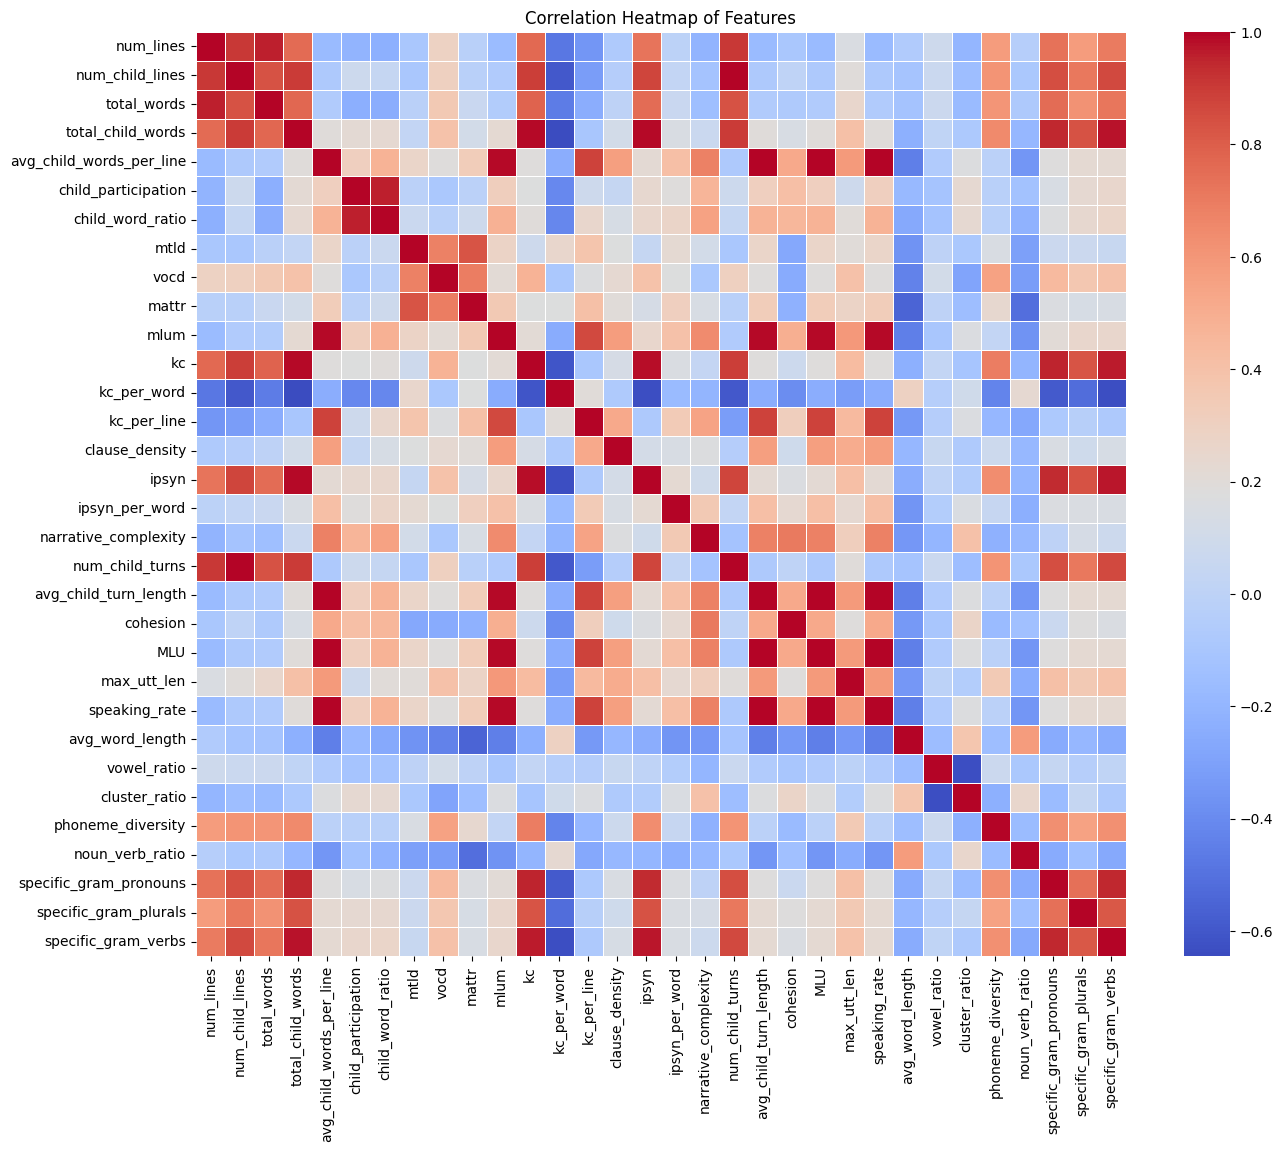

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df[feature_columns]

# Compute correlation matrix
corr = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

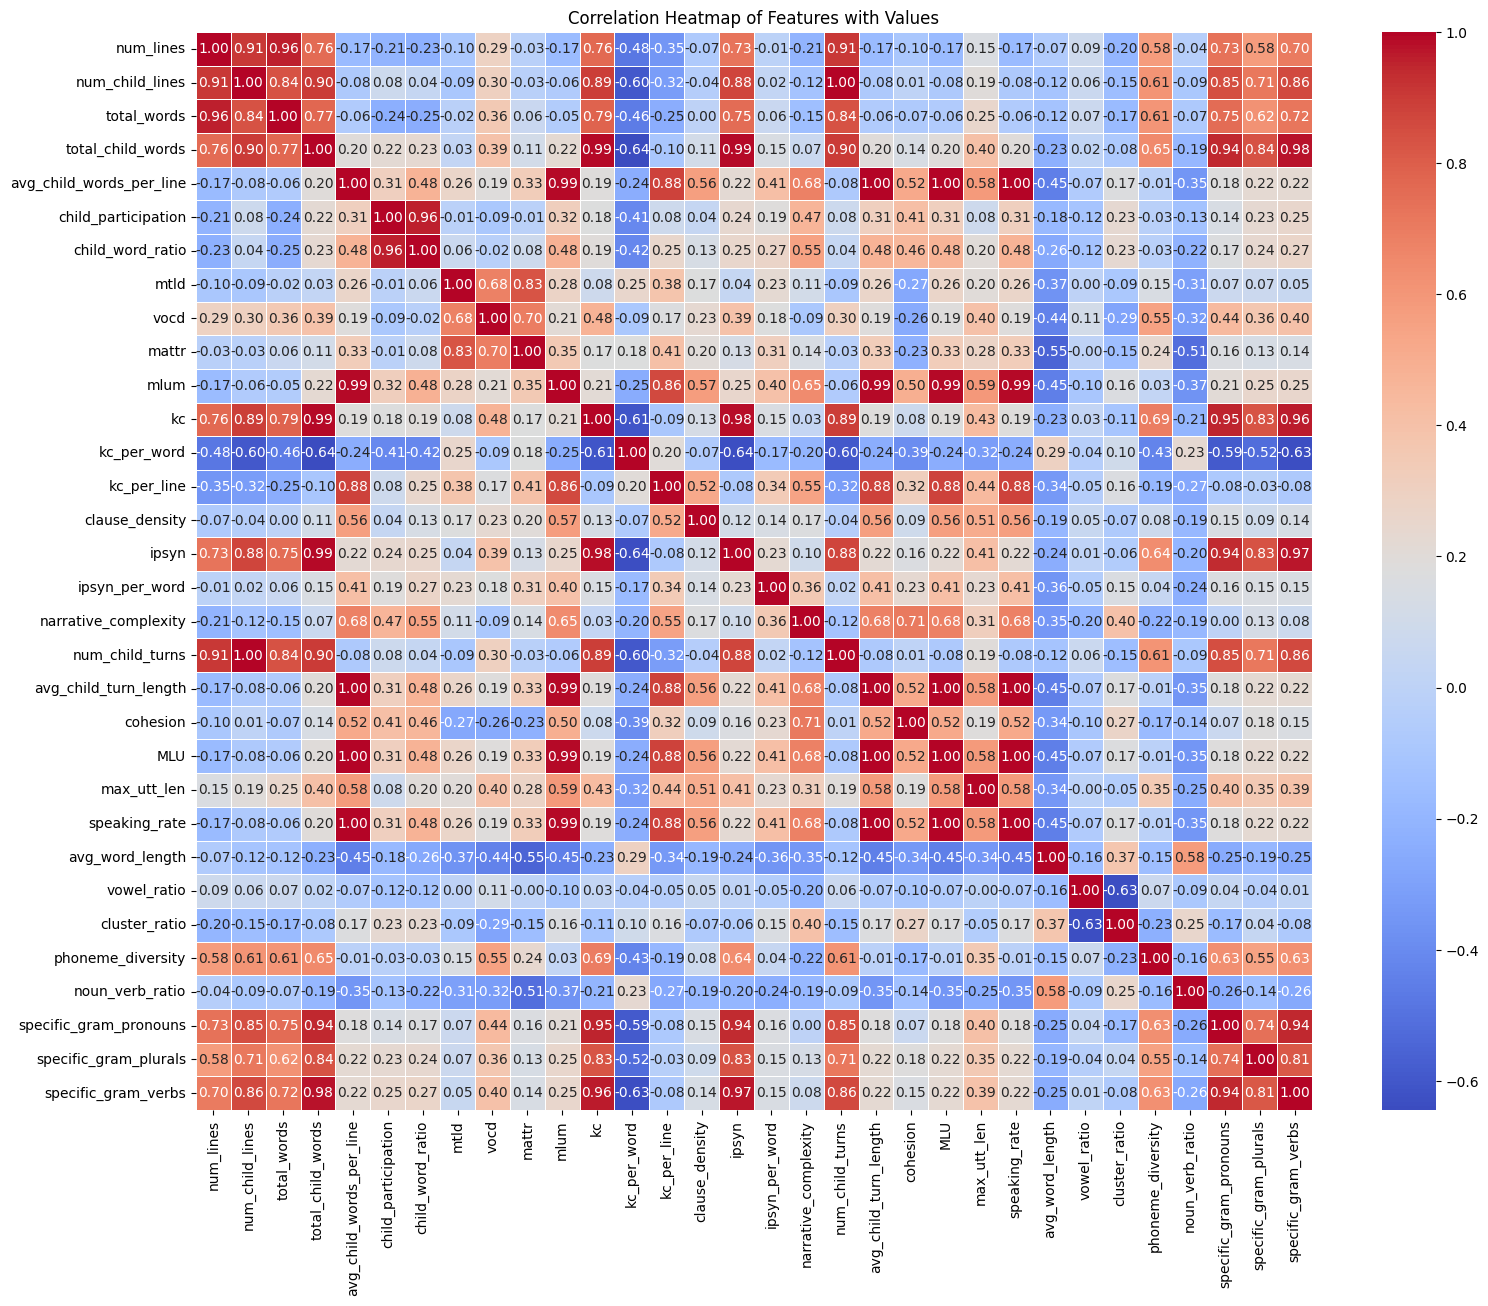

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df[feature_columns].corr()

# Plot heatmap with numbers
plt.figure(figsize=(18,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features with Values")
plt.show()

/tmp/ipython-input-2030249509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_bin_readable', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2030249509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_bin_readable', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2030249509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_bin_readable', y=feature, data=df, palette='Set2')
/tmp/ipython-input-2030249509.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

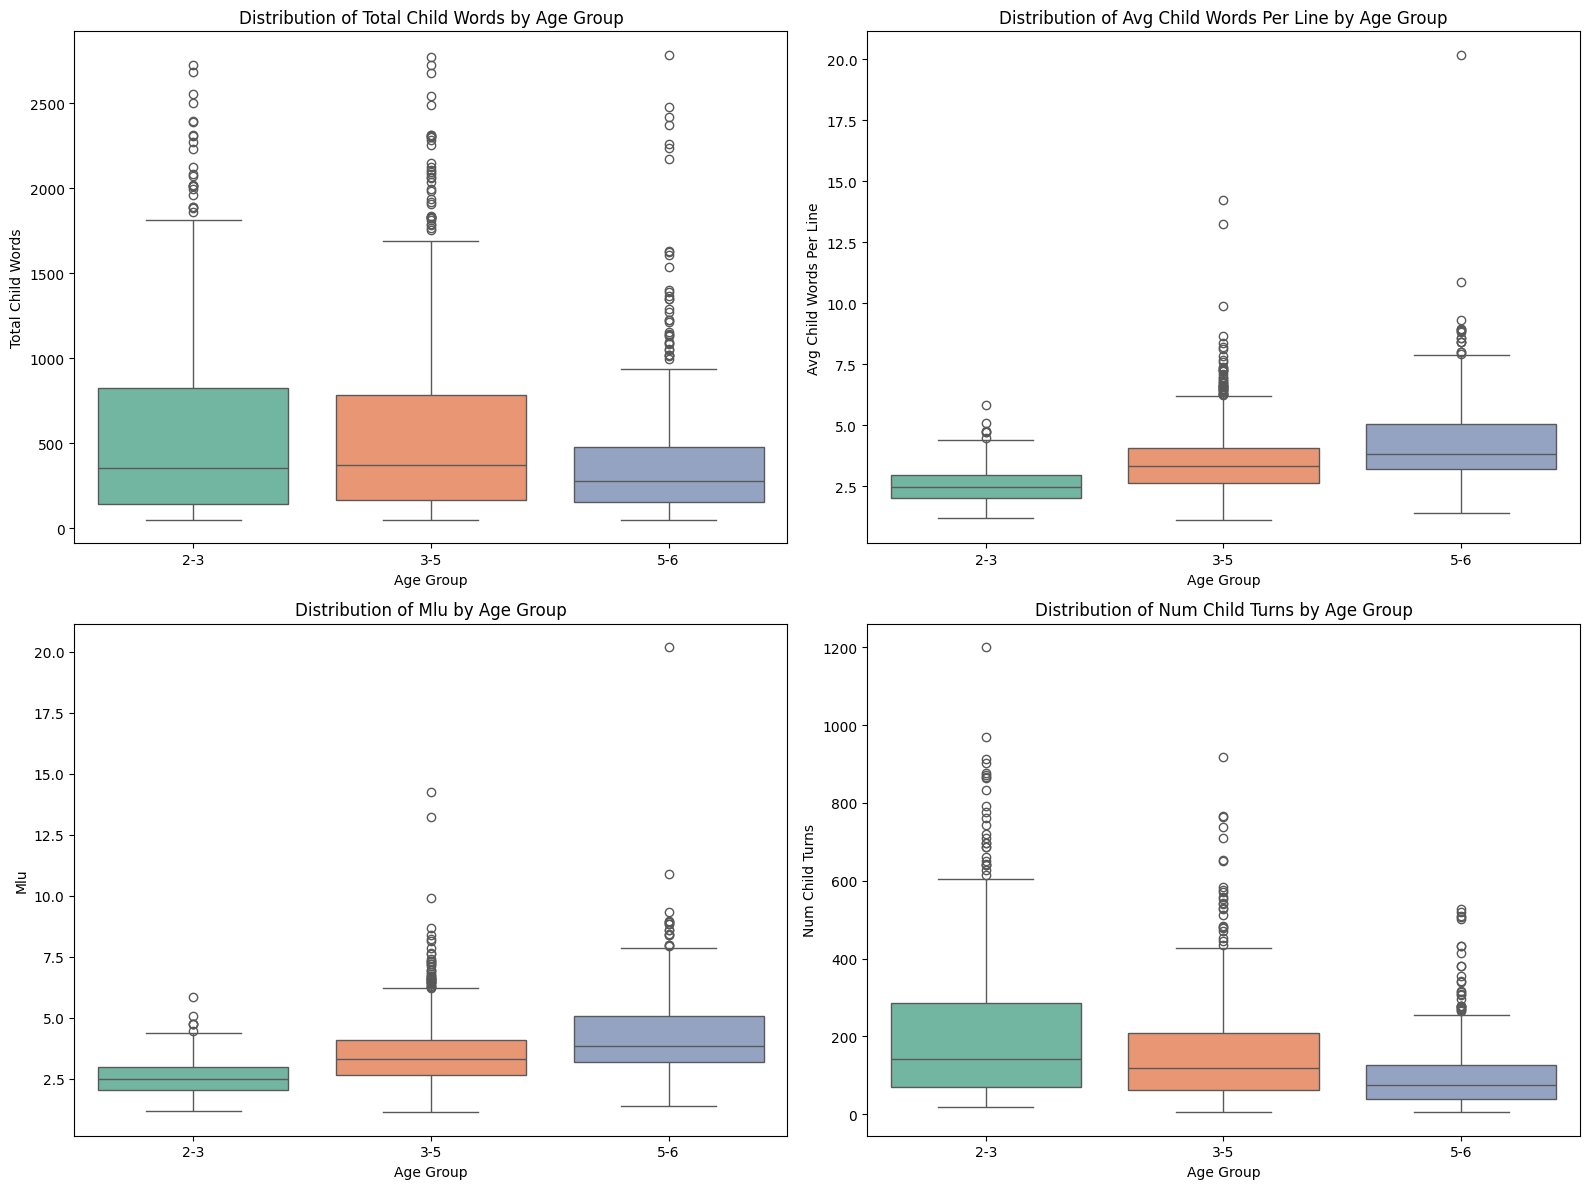

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Important features to visualize
features_to_plot = ['total_child_words', 'avg_child_words_per_line', 'MLU', 'num_child_turns']

plt.figure(figsize=(16,12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='age_bin_readable', y=feature, data=df, palette='Set2')
    plt.title(f"Distribution of {feature.replace('_',' ').title()} by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel(feature.replace('_',' ').title())

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import json

file_path = "/content/drive/MyDrive/Final_Project/kids_dataset_features (1).csv"
df = pd.read_csv(file_path)
df["conversation_excel"] = df["conversation"].apply(json.dumps)

In [ ]:
df.to_excel(
    "kids_dataset_features.xlsx",
    index=False,
    engine="openpyxl"
)